In [1]:
# Cryptocurrency Market Analytics
# API-Based Data Visualization Project

# Author: Deep  
# Tools: Python, Pandas, Matplotlib, Seaborn, Plotly APIs  


In [2]:
 # Import Libraries

In [3]:
!pip install requests pandas matplotlib seaborn plotly


In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [5]:
# Fetch Data from API

In [6]:
url = "https://api.coingecko.com/api/v3/ping"
response = requests.get(url)
response.json()


{'gecko_says': '(V3) To the Moon!'}

In [7]:
 # Data Collecting

In [8]:
url = "https://api.coingecko.com/api/v3/coins/markets"

params = {
    "vs_currency": "usd",
    "order": "market_cap_desc",
    "per_page": 10,
    "page": 1,
    "sparkline": False
}

response = requests.get(url, params=params)
data = response.json()

df = pd.DataFrame(data)
df.head()


,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,68473.000000,1369264108809,1,1369264108809,158572519845,68514.000000,...,1.998518e+07,2.100000e+07,126080.00,-45.69074,2025-10-06T18:57:42.558Z,67.810000,1.008793e+05,2013-07-06T00:00:00.000Z,None,2026-02-06T15:42:08.050Z
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,1979.010000,239048117686,2,239048117686,73797923759,2004.910000,...,1.206929e+08,NaN,4946.05,-59.98811,2025-08-24T19:21:03.333Z,0.432979,4.569680e+05,2015-10-20T00:00:00.000Z,"{'times': 37.629995041462955, 'currency': 'btc...",2026-02-06T15:42:08.581Z
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,0.999643,185648083783,3,191113020475,248256429584,0.999618,...,1.911830e+11,NaN,1.32,-24.44598,2018-07-24T00:00:00.000Z,0.572521,7.460524e+01,2015-03-02T00:00:00.000Z,None,2026-02-06T15:42:08.934Z
3,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,1.520000,92238768462,4,151394717907,16813284397,1.510000,...,9.998572e+10,1.000000e+11,3.65,-58.40340,2025-07-18T03:40:53.808Z,0.002686,5.636510e+04,2014-05-22T00:00:00.000Z,None,2026-02-06T15:42:12.303Z
4,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,650.470000,88811373005,5,88811373005,4778646750,670.850000,...,1.363597e+08,2.000000e+08,1369.99,-52.51987,2025-10-13T08:41:24.131Z,0.039818,1.633530e+06,2017-10-19T00:00:00.000Z,None,2026-02-06T15:42:06.427Z


In [9]:
# Exploratory Data Analysis

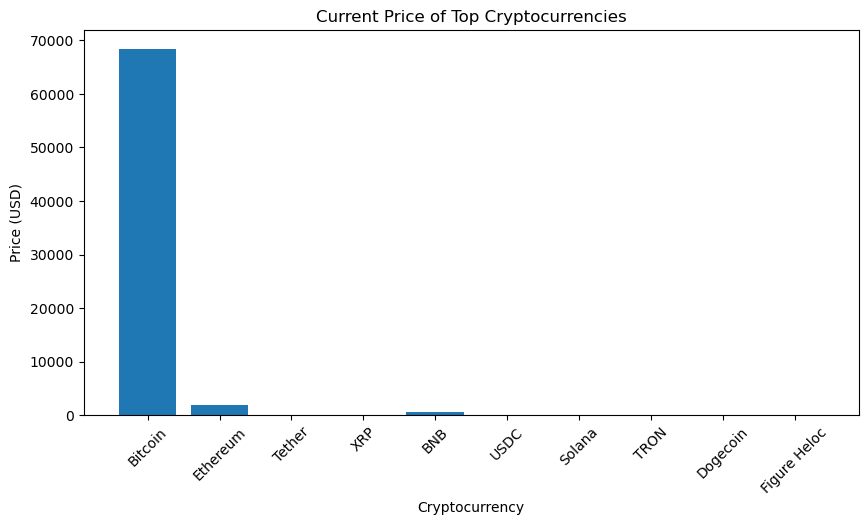

In [31]:
import os
import matplotlib.pyplot as plt

os.makedirs("images", exist_ok=True)

plt.figure(figsize=(10,5))
plt.bar(df["name"], df["current_price"])
plt.title("Current Price of Top Cryptocurrencies")
plt.xlabel("Cryptocurrency")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)

plt.savefig("images/current_price.png", dpi=300, bbox_inches="tight")
plt.show()


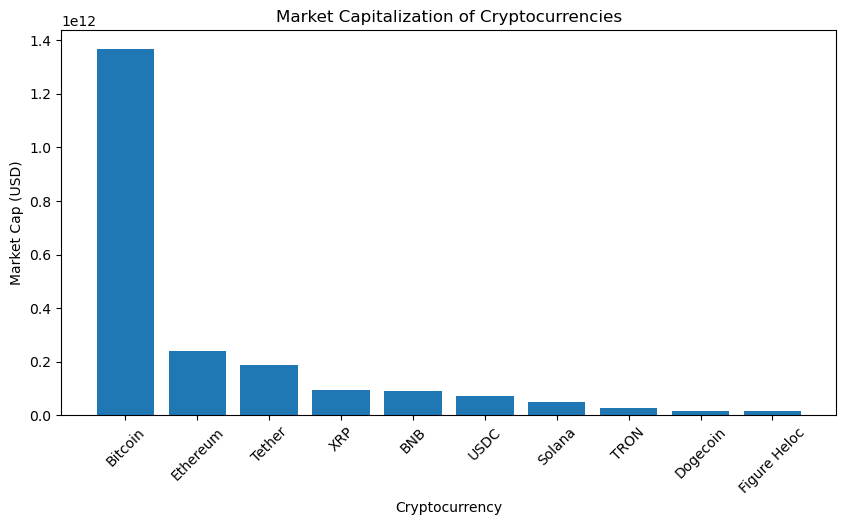

In [35]:
plt.figure(figsize=(10,5))
plt.bar(df["name"], df["market_cap"])
plt.title("Market Capitalization of Cryptocurrencies")
plt.xlabel("Cryptocurrency")
plt.ylabel("Market Cap (USD)")
plt.xticks(rotation=45)

plt.savefig("images/market_cap.png", dpi=300, bbox_inches="tight")
plt.show()

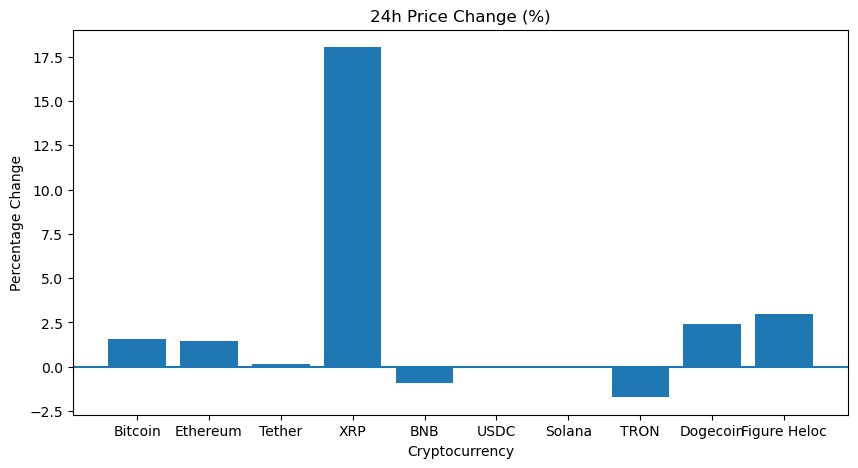

In [39]:
plt.figure(figsize=(10,5))
plt.bar(df["name"], df["price_change_percentage_24h"])
plt.title("24h Price Change (%)")
plt.xlabel("Cryptocurrency")
plt.ylabel("Percentage Change")
plt.axhline(0)

plt.savefig("images/price_change_24h.png", dpi=300, bbox_inches="tight")
plt.show()


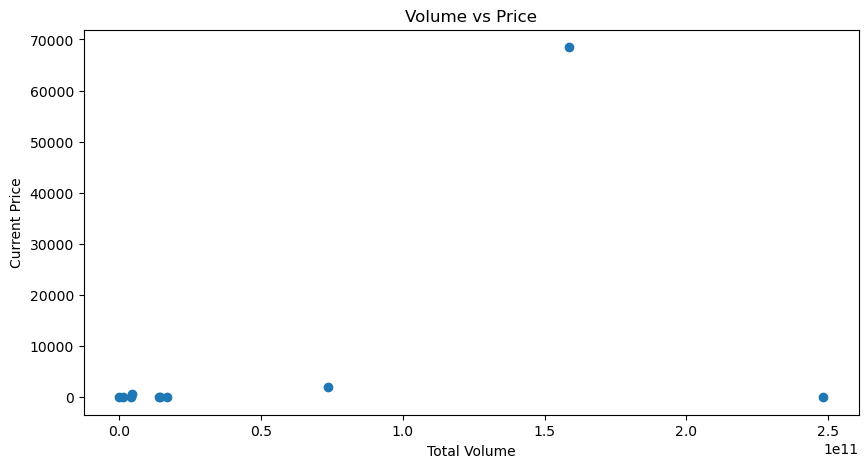

In [44]:
plt.figure(figsize=(10,5))
plt.scatter(df["total_volume"], df["current_price"])
plt.title("Volume vs Price")
plt.xlabel("Total Volume")
plt.ylabel("Current Price")

plt.savefig("images/volume_vs_price.png", dpi=300, bbox_inches="tight")
plt.show()


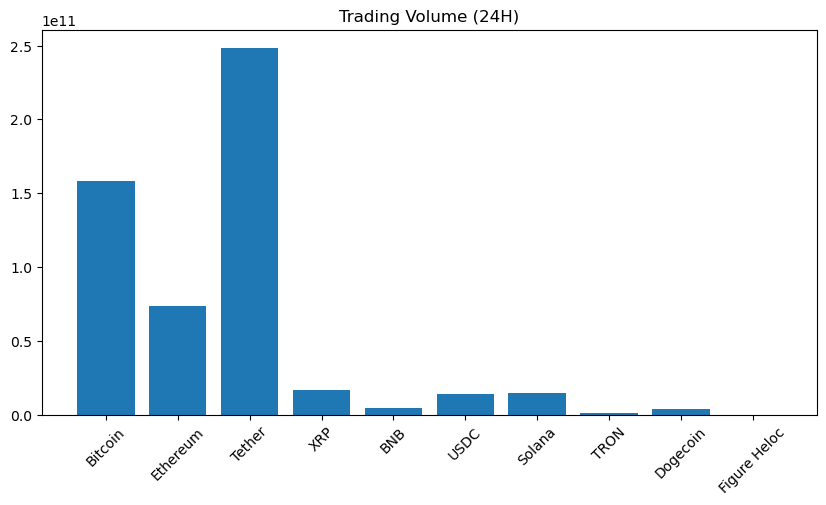

In [43]:
plt.figure(figsize=(10,5))
plt.bar(df['name'], df['total_volume'])
plt.xticks(rotation=45)
plt.title("Trading Volume (24H)")
plt.show()


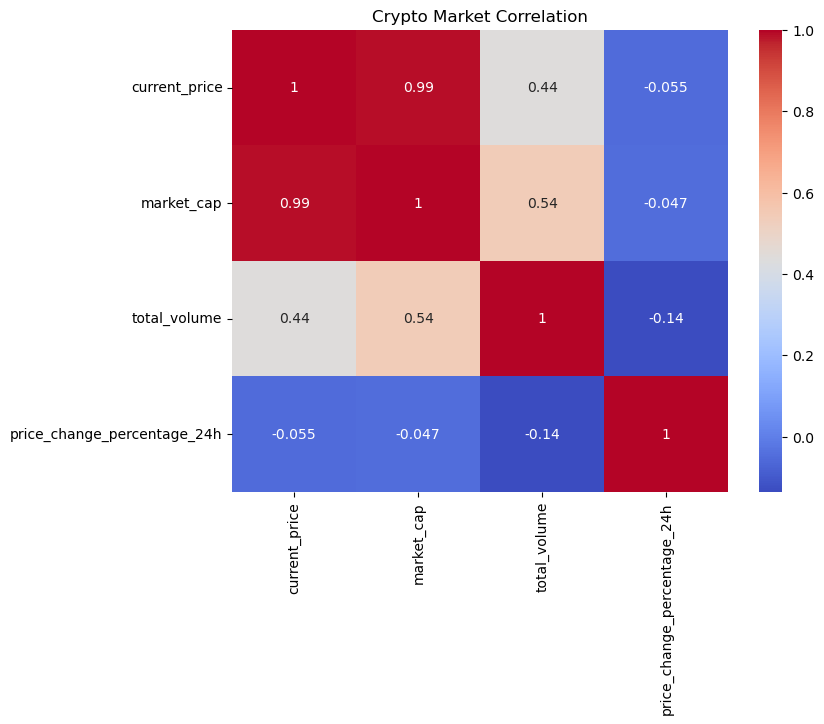

In [14]:
corr = df[['current_price','market_cap','total_volume','price_change_percentage_24h']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Crypto Market Correlation")
plt.show()


In [15]:
# Data Visualization

In [16]:
btc_url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"

params = {
    "vs_currency": "usd",
    "days": 30
}

btc_data = requests.get(btc_url, params=params).json()


In [17]:
prices = btc_data['prices']
btc_df = pd.DataFrame(prices, columns=['timestamp','price'])
btc_df['date'] = pd.to_datetime(btc_df['timestamp'], unit='ms')


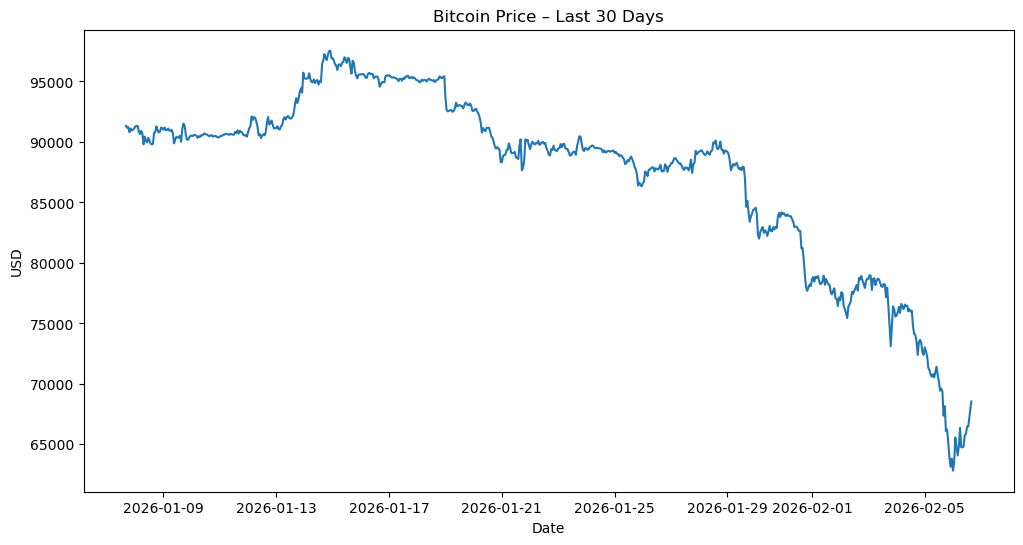

In [18]:
plt.figure(figsize=(12,6))
plt.plot(btc_df['date'], btc_df['price'])
plt.title("Bitcoin Price – Last 30 Days")
plt.xlabel("Date")
plt.ylabel("USD")
plt.show()


In [19]:
fig = px.line(
    btc_df,
    x='date',
    y='price',
    title="Bitcoin Price Trend (Interactive)"
)
fig.show()


In [20]:
 # Key Insights

In [21]:
def fetch_crypto_data():
    response = requests.get(url, params=params)
    return pd.DataFrame(response.json())
